# Precipitation script examples

Following a series of plots that you can generate through `plot_precipitation.py` script

### Import modules:

In [1]:
import os
import sys
from precip.cli import plot_precipitation
import matplotlib.pyplot as plt
from matplotlib import gridspec

%load_ext ipython
# Bar plot over a volcano

The following will plot precipitation over Merapi volcano for a brief period, from **01 January 2006** to **01 January 2010**, during this period an eruption occured (**2006-03-16**).
We are applying a rolling average of 10, 30, and 90 (default) days and splitting the data up to 3 different colors, grouped by ascending values.

We will also add an event

*Note: if no period is selected, the starting date will be set to **2000 June 01** and the ending date (at the current state 2024/07/02) will be set to **2024 June 01** (check Help for updates).
Please also note that when using a n-day rolling average, any eruptions occurring within the first or last n-1 days will not be plotted due to the nature of rolling averages.

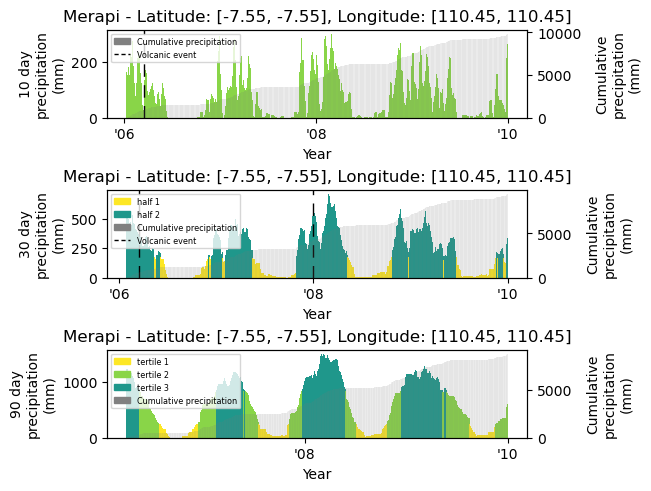

In [2]:
%%capture --no-display
%matplotlib inline
# %tb

volcano = 'Merapi'
period = '20060101:20100101'
style = 'bar'

fig = plt.figure(constrained_layout=True)
main_gs = gridspec.GridSpec(3, 1, figure=fig)

iargs = [volcano, '--style', style, '--period', period, '--bins', '1', '--roll', '10', '--no-show']
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[0], fig=fig)

iargs = [volcano, '--style', style, '--period', period, '--bins', '2', '--add-event', '20080101', '--roll', '30', '--no-show']
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[1], fig=fig)

iargs = [volcano, '--style', style, '--period', period, '--bins', '3', '--no-show'] 
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[2], fig=fig)

# Plotting by strength
In the following, precipitations are order in ascending order based on Precipitation value, plotted on a logarithmic scale.

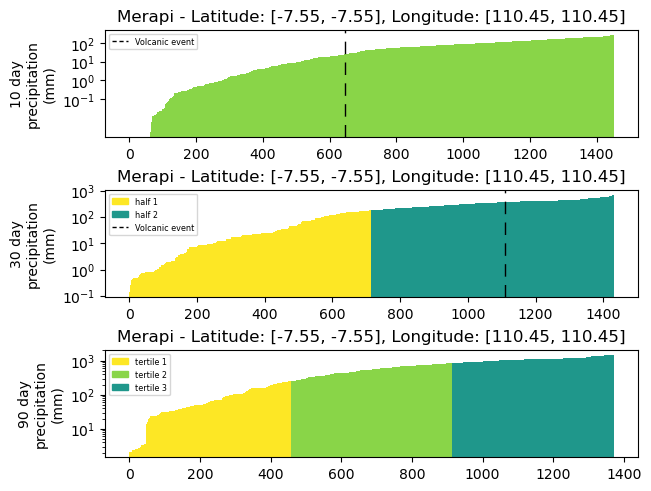

In [8]:
%%capture --no-display
%matplotlib inline

volcano = 'Merapi'
period = '20060101:20100101'
style = 'strength'

fig = plt.figure(constrained_layout=True)
main_gs = gridspec.GridSpec(3, 1, figure=fig)

iargs = [volcano, '--style', style, '--period', period, '--bins', '1', '--log', '--roll', '10', '--no-show']
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[0], fig=fig)

iargs = [volcano, '--style', style, '--period', period, '--bins', '2', '--log', '--roll', '30', '--no-show']
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[1], fig=fig)

iargs = [volcano, '--style', style, '--period', period, '--bins', '3', '--log', '--no-show'] 
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[2], fig=fig)

# Annual plot


The annual plot will show a set of lines divided by year, for better clarity we will expand the time frame, from **01 January 2006** to **01 January 2010**. On the right side of the main plot, we can see the cumulative precipitation for each year.

We also add the **La Nina** event (same for El Nino).

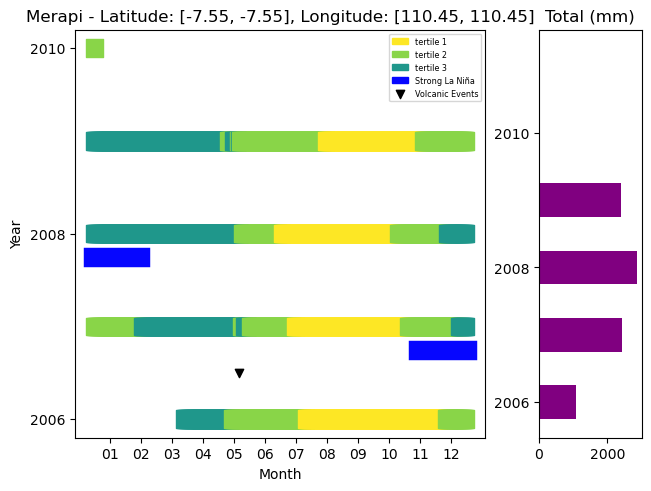

In [4]:
%%capture --no-display
%matplotlib inline

volcano = 'Merapi'
period = '20060101:20100101'
style = 'annual'

fig = plt.figure(constrained_layout=True)
main_gs = gridspec.GridSpec(1, 1, figure=fig)

iargs = [volcano, '--style', style, '--period', period, '--bins', '3', '--elnino', '--add-event', '20060501', '--no-show']
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[0], fig=fig)

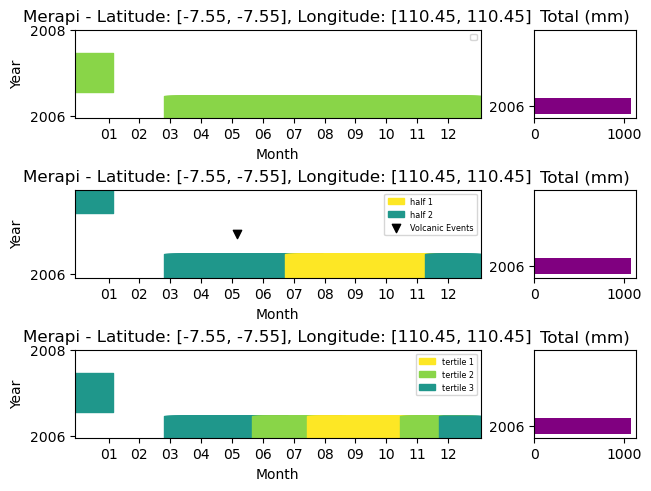

In [5]:
%%capture --no-display
%matplotlib inline

volcano = 'Merapi'
period = '20060101:20070101'
style = 'annual'

fig = plt.figure(constrained_layout=True)
main_gs = gridspec.GridSpec(3, 1, figure=fig)

iargs = [volcano, '--style', style, '--period', period, '--bins', '1', '--no-show']
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[0], fig=fig)

iargs = [volcano, '--style', style, '--period', period, '--bins', '2', '--elnino', '--add-event', '20060501', '--no-show']
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[1], fig=fig)

iargs = [volcano, '--style', style, '--period', period, '--bins', '3', '--no-show'] 
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[2], fig=fig)

# Map

Additionally, we have the capability to visualize precipitation data as a map overlay, representing either the rate of precipitation or the cumulative total (yet to implement) across a specific area.

We can choose the area in 3 ways:
- Use the Volcano Name positional argument which will show the area centered around said volcano of a 4x4$^\circ$ extension.
- Use the argument `--lalo` with the following sintax `14.5:15.5:35.4:37.4`
- Use the `--polygon` argument with the following sintax `'POLYGON((-80.4699 25.5823,-79.9622 25.5823,-79.9622 25.9211,-80.4699 25.9211,-80.4699 25.5823))'`

The polygon can be retrieved from the [ASF Search](https://search.asf.alaska.edu/#/) website.

A series of option are available for better displaying:
- `--interpolate`: increase the resolution of the grid by interpolating precipitatin value
- `--isolines`: increase the number of isolines
- `--isolines-color`: change the color of isolines
- `--colorbar`: set the color of the colorbar
- `--vlim`: set the min and max values of precipitation 

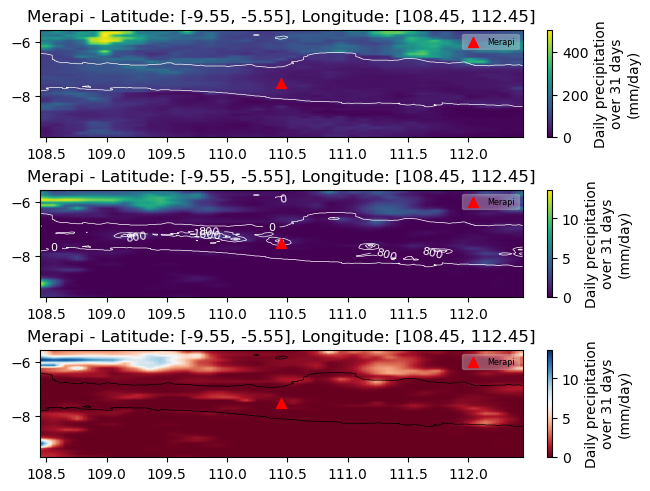

In [6]:
%%capture --no-display
%matplotlib inline

fig = plt.figure(constrained_layout=True)
main_gs = gridspec.GridSpec(3, 1, figure=fig)

iargs = ['Merapi', '--style', 'map', '--period', '20000601:20000701', '--no-show']
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[0], fig=fig)

iargs = ['Merapi', '--style', 'map', '--period', '20000601:20000701', '--interpolate', '3', '--isolines', '3', '--no-show']
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[1], fig=fig)

iargs = ['Merapi', '--style', 'map', '--period', '20000601:20000701', '--interpolate', '3', '--colorbar', 'RdBu', '--isolines-color', 'black', '--no-show'] 
fig = plot_precipitation.main(iargs=iargs, namespace=None, main_gs=main_gs[2], fig=fig)

# Help command

For more options check the help options down below or execute the command: `plot_precipitation.py --h` from terminal

In [7]:
!plot_precipitation.py --h

usage: plot_precipitation.py [-h] [--volcano-name NAME]
                             [--style {daily,weekly,monthly,yearly,map,bar,annual,strength}]
                             [--download] [--list] [--check] [--use-ssh]
                             [--parallel PARALLEL]
                             [--latitude [LATITUDE or LATITUDE:LATITUDE]]
                             [--longitude [LONGITUDE or LONGITUDE:LONGITUDE]]
                             [--lalo [LATITUDE,LONGITUDE or LATITUDE:LATITUDE,LONGITUDE:LONGITUDE]]
                             [--polygon POLYGON] [--start-date [YYYYMMDD]]
                             [--end-date [YYYYMMDD]]
                             [--period [YYYYMMDD:YYYYMMDD, YYYYMMDD,YYYYMMDD]]
                             [--add-event [YYYYMMDD, YYYY-MM-DD ...]] [--log]
                             [--bins BINS] [--roll ROLL] [--elnino]
                             [--no-show] [--vlim VMIN VMAX]
                             [--interpolate GRANULARITY] [--is